In [1]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import io
import os
from io import StringIO

os.getcwd()

'C:\\Users\\14029'

In [30]:
## 1 & 2 import libraries and read URL file

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
df = pd.read_csv(url)

df.head(10)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [31]:
## 3 create a script that will read a text file line by line

organize_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names"
string = requests.get(organize_url).text
s = io.StringIO(string)

titles = []
for line in s:
    if line.startswith(("|","\n",">")):
        pass
    else:
        var=line.split(":")[0]
        titles.append(var)
        
titles

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country']

In [32]:
## 4 add 'Income'

titles.append('income')

titles

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

In [18]:
## 5 find missing values

df.isnull().sum()

39                0
 State-gov        0
 77516            0
 Bachelors        0
 13               0
 Never-married    0
 Adm-clerical     0
 Not-in-family    0
 White            0
 Male             0
 2174             0
 0                0
 40               0
 United-States    0
 <=50K            0
dtype: int64

In [39]:
## 6 create DF with age, education and occupation

df = pd.read_csv(url,names=titles)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [43]:
specific_df = df[['age','education','occupation']]
specific_df.head(10)

,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners
3,53,11th,Handlers-cleaners
4,28,Bachelors,Prof-specialty
5,37,Masters,Exec-managerial
6,49,9th,Other-service
7,52,HS-grad,Exec-managerial
8,31,Masters,Prof-specialty
9,42,Bachelors,Exec-managerial


<AxesSubplot:>

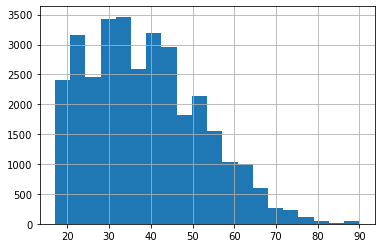

In [45]:
## 7 plotting age with bin size 20

specific_df['age'].hist(bins=20)

In [48]:
## 8 strip whitespace

def strip_whitespace(s):
    return s.strip()

In [55]:
## 9 modify with apply

specific_df['education_stripped']=df['education'].apply(strip_whitespace)
specific_df['education']=filtered_df['education_stripped']
specific_df.drop(labels=['education_stripped'],axis=1,inplace=True)
# Occupation column
specific_df['occupation_stripped']=df['occupation'].apply(strip_whitespace)
specific_df['occupation']=filtered_df['occupation_stripped']
specific_df.drop(labels=['occupation_stripped'],axis=1,inplace=True)

specific_df['age']=df['age']

specific_df.head(10)

<ipython-input-55-da8d3d3b0982>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_df['education_stripped']=df['education'].apply(strip_whitespace)


KeyError: 'education_stripped'

In [56]:
## 10 # of people between 30-50

specific_df=specific_df[(specific_df['age']>=30) & (specific_df['age']<=50)]
specific_df.head(10)

,age,education,occupation,education_stripped
0,39,Bachelors,Adm-clerical,Bachelors
1,50,Bachelors,Exec-managerial,Bachelors
2,38,HS-grad,Handlers-cleaners,HS-grad
5,37,Masters,Exec-managerial,Masters
6,49,9th,Other-service,9th
8,31,Masters,Prof-specialty,Masters
9,42,Bachelors,Exec-managerial,Bachelors
10,37,Some-college,Exec-managerial,Some-college
11,30,Bachelors,Prof-specialty,Bachelors
13,32,Assoc-acdm,Sales,Assoc-acdm


In [58]:
## 11 grouping

specific_df.groupby (['education']).mean()

,age
education,
10th,39.055921
11th,38.777188
12th,38.362319
1st-4th,39.384615
5th-6th,40.422222
7th-8th,40.617021
9th,38.894737
Assoc-acdm,38.825816
Assoc-voc,38.803851


In [60]:
## 12 grouping by occupation etc

specific_df.groupby('occupation').describe()['age']

,count,mean,std,min,25%,50%,75%,max
occupation,,,,,,,,
?,375.0,38.538667,6.198842,30.0,33.00,37.0,43.50,50.0
Adm-clerical,1788.0,39.206376,5.920233,30.0,34.00,39.0,44.00,50.0
Armed-Forces,4.0,37.250000,6.898067,30.0,33.00,36.5,40.75,46.0
Craft-repair,2429.0,39.044874,5.895650,30.0,34.00,38.0,44.00,50.0
Exec-managerial,2479.0,40.091166,5.759625,30.0,35.00,40.0,45.00,50.0
Farming-fishing,455.0,39.294505,5.546070,30.0,35.00,39.0,43.00,50.0
Handlers-cleaners,533.0,38.045028,5.939374,30.0,33.00,37.0,43.00,50.0
Machine-op-inspct,1090.0,39.240367,5.936225,30.0,34.00,39.0,44.00,50.0
Other-service,1305.0,38.627586,5.907714,30.0,34.00,38.0,44.00,50.0


In [61]:
## 13 us subset and groupby to filter outliers

occupation_stats = specific_df.groupby('occupation').describe()['age']

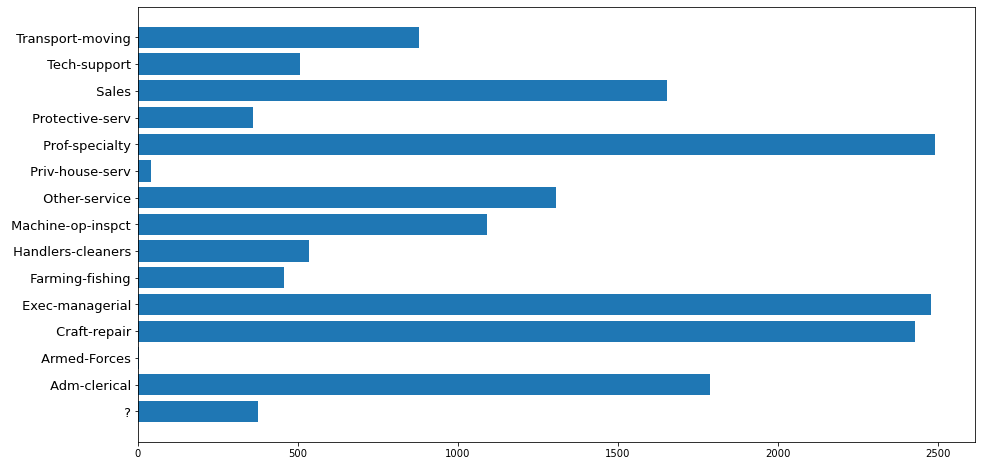

In [62]:
## 14 plot on bar cart

plt.figure(figsize=(15,8))
plt.barh(y=occupation_stats.index,width=occupation_stats['count'])
plt.yticks(fontsize=13)
plt.show()

In [63]:
## 15 merge using common info

df_1 = df[['age','workclass','occupation']].sample(5,random_state=101)

df_2 = df[['education','race','occupation']].sample(5,random_state=101)

df_merged = pd.merge(df_1,df_2,on='occupation',how='inner').drop_duplicates()

df_merged

,age,workclass,occupation,education,race
0,51,Private,Machine-op-inspct,HS-grad,White
1,19,Private,Sales,11th,White
2,40,Private,Exec-managerial,HS-grad,White
3,17,Private,Handlers-cleaners,10th,White
4,61,Private,Craft-repair,7th-8th,White
